## Index
[1. Import libraries](#1.-Import-libraries)
    
[2. Load dataset from csv to dataframe](#2.-Load-dataset-from-csv-to-dataframe)

[3. Describe dataset's basic properties](#3.-Describe-dataset's-basic-properties)
* [3.1. Number of rows and columns in dataset](#3.1.-Number-of-rows-and-columns-in-dataset:)
* [3.2. Columns in the dataset](#3.2.-Columns-in-the-dataset:)
* [3.3. Let's take a look at the copy of the original dataframe](#3.3.-Let's-take-a-look-at-the-copy-of-the-original-dataframe.)

[4. Exploring Data](#4.-Exploring-Data:)
* [4.1. Initial analysis of dataset](#4.1.-Initial-analysis-of-dataset)
* [4.2. Digging into the data](#4.2.-Digging-into-the-data:)

[5. Data Visualisation](#5.-Data-Visualisation:)
* [5.1. How council districts are grouped under each police district](#5.1.-How-council-districts-are-grouped-under-each-police-district:)
* [5.2. How many cases were generated from each of the council districts](#5.2.-How-many-cases-were-generated-from-each-of-the-council-districts:)
* [5.3. Trend of number of cases generated per year](#5.3.-Trend-of-number-of-cases-generated-per-year:)

[6. Predicting a dependent variable using 2 other features](#6.-Predicting-a-dependent-variable-using-2-other-features.)

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb



## 2. Load dataset from csv to dataframe

### Dataset: HousingPermits_2014Q3-11Apr16

#### Dataset as described on Open Baltimore website: 
Baltimore Housing's Office of Permits & Building Inspections enforces the Baltimore City Building Code, as well as state laws pertaining to construction and occupancy. This office issues building permits and provides subsequent inspections for; construction, alteration, electrical, mechanical and plumbing work in both commercial and residential structures.

In [2]:
original_df = pd.read_csv("../datasets/HousingPermits_2014Q3-11Apr16.csv")
df = original_df

## 3. Describe dataset's basic properties

### 3.1. Number of rows and columns in dataset:

In [3]:
# using original_df so that we can refer back to this cell's output later, if need be (Because df later changes)
print( "Rows = " + str(original_df.shape[0]) + "; Columns = " + str(original_df.shape[1]) )

Rows = 200885; Columns = 15


### 3.2. Columns in the dataset:
#### Column description was not provided on Open Baltimore. Meanings derived from understanding and data visualisation
- **CaseNum**: Case number identifier of a ticket/case submitted to the Baltimore Housing's Office of Permits and Building Inspections.
- **Block**: The block number a particular house belongs to.
- **Lot**: The housing lot a particular house belongs to.
- **PropertyAddress**: The address of the house.
- **PermitNum**: It is the same value as the case number.
- **DateIssue**: Date on which the permit was issued.
- **PermitDescription**: Decsription of the permit.
- **Cost_Est**: Estimated Cost of the house.
- **DateExpire**: date of expiry of sanctioned permit.
- **Prop_Use**: Proposed use of the house/property.
- **Existing_Use**: The current use of the house/property.
- **Neighborhood**: Neighbourhood of the house/property.
- **PoliceDistrict**: Police district whose jurisdiction the house comes under.
- **CouncilDistrict**: Council district whose jurisdiction the house comes under.
- **Location**: Location of the house in latitude and longitude.

In [4]:
# using original_df so that we can refer back to this cell's output later, if need be (Because df later changes)
print("Original dataframe = ")
print(original_df.columns)

Original dataframe = 
Index(['CaseNum', 'Block', 'Lot', 'PropertyAddress', 'PermitNum', 'DateIssue',
       'PermitDescription', 'Cost_Est', 'DateExpire', 'Prop_Use',
       'Existing_Use', 'Neighborhood', 'PoliceDistrict', 'CouncilDistrict',
       'Location'],
      dtype='object')


#### Column Types:

In [5]:
# using original_df so that we can refer back to this cell's output later, if need be (Because df later changes)
original_df.dtypes

CaseNum               object
Block                 object
Lot                   object
PropertyAddress       object
PermitNum             object
DateIssue             object
PermitDescription     object
Cost_Est             float64
DateExpire            object
Prop_Use              object
Existing_Use          object
Neighborhood          object
PoliceDistrict        object
CouncilDistrict      float64
Location              object
dtype: object

### 3.3. Let's take a look at the copy of the original dataframe.
**I shall keep revisting these next 2 cells to see outputs after dropping rows/columns, correcting data.**

In [6]:
# using original_df so that we can refer back to this cell's output later, if need be (Because df later changes)
print("Copy of original dataframe = ")
print(df.columns)

Copy of original dataframe = 
Index(['CaseNum', 'Block', 'Lot', 'PropertyAddress', 'PermitNum', 'DateIssue',
       'PermitDescription', 'Cost_Est', 'DateExpire', 'Prop_Use',
       'Existing_Use', 'Neighborhood', 'PoliceDistrict', 'CouncilDistrict',
       'Location'],
      dtype='object')


In [7]:
df

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,USE2014-00466,1529,051,1715 E PRESTON ST,USE2014-00466,07/02/2014,use premises as a single family dwelling,NaN,NaN,SF,VAC,BROADWAY EAST,Eastern,12.0,"1715 E PRESTON ST\nBaltimore, MD\n(39.305351, ..."
1,COM2014-13829,3350A,033,2915 OAKFORD AVE,COM2014-13829,07/02/2014,service upgrade to 200 amps as per code.,1900.0,01/02/2015,SF,SF,PARKLANE,Northern,6.0,"2915 OAKFORD AVE\nBaltimore, MD\n(39.341439, -..."
2,USE2013-02896,1573,006,1027 N MILTON AVE,USE2013-02896,07/02/2014,(use)the premises for single family dwelling,NaN,NaN,SF,VAC,BIDDLE STREET,Eastern,13.0,"1027 N MILTON AVE\nBaltimore, MD\n(39.303056, ..."
3,USE2014-00824,3861,002E,3113 SAINT PAUL ST,USE2014-00824,07/02/2014,use portion of premises 2nd floor as 3 dwelli...,NaN,NaN,MF,MF,CHARLES VILLAGE,Northern,14.0,"3113 SAINT PAUL ST\nBaltimore, MD\n(39.326325,..."
4,USE2014-00891,6570,066,4623 DILLON PL,USE2014-00891,07/02/2014,use as a single family dwelling,NaN,NaN,SF,SF,NaN,Southeastern,1.0,"4623 DILLON PL\nBaltimore, MD\n(39.282325, -76..."
5,COM2014-04849,1810,003,606 S BROADWAY ST,COM2014-04849,07/02/2014,new interior alterations (to include lobby m...,10000.0,01/02/2014,MIXR,VAL,FELLS POINT,Southeastern,1.0,"606 S BROADWAY ST\nBaltimore, MD\n(39.284216, ..."
6,USE2014-01022,0711,049A,1825-1835 COLE ST,USE2014-01022,07/02/2014,use portion of existing auto repair as a auto ...,NaN,NaN,MIXC,COM,CARROLLTON RIDGE,Southern,9.0,"1825 1835 COLE ST\nBaltimore, MD\n(39.282035, ..."
7,COM2014-08104,6332,014,5510 NATHAN SHOCK DR,COM2014-08104,07/02/2014,modification of existing wet pipe sprinkler sy...,20000.0,01/02/2015,HCF,HCF,HOPKINS BAYVIEW,Southeastern,1.0,"5510 NATHAN SHOCK DR\nBaltimore, MD\n(39.29118..."
8,USE2014-02160,3554,023,3702 ELM AVE,USE2014-02160,07/02/2014,use premises as a single family dwelling,NaN,NaN,SF,VAC,HAMPDEN,Northern,14.0,"3702 ELM AVE\nBaltimore, MD\n(39.333124, -76.6..."
9,COM2014-11191,0966,021,1211 LIGHT ST,COM2014-11191,07/02/2014,to install small cell rooftop telecommunicatio...,50000.0,07/02/2015,MF,MF,FEDERAL HILL,NaN,NaN,"1211 LIGHT ST\nBaltimore, MD\n(39.275536, -76...."


## 4. Exploring Data:

### 4.1. Initial analysis of dataset:

In [8]:
df.head(50)

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,USE2014-00466,1529,051,1715 E PRESTON ST,USE2014-00466,07/02/2014,use premises as a single family dwelling,NaN,NaN,SF,VAC,BROADWAY EAST,Eastern,12.0,"1715 E PRESTON ST\nBaltimore, MD\n(39.305351, ..."
1,COM2014-13829,3350A,033,2915 OAKFORD AVE,COM2014-13829,07/02/2014,service upgrade to 200 amps as per code.,1900.0,01/02/2015,SF,SF,PARKLANE,Northern,6.0,"2915 OAKFORD AVE\nBaltimore, MD\n(39.341439, -..."
2,USE2013-02896,1573,006,1027 N MILTON AVE,USE2013-02896,07/02/2014,(use)the premises for single family dwelling,NaN,NaN,SF,VAC,BIDDLE STREET,Eastern,13.0,"1027 N MILTON AVE\nBaltimore, MD\n(39.303056, ..."
3,USE2014-00824,3861,002E,3113 SAINT PAUL ST,USE2014-00824,07/02/2014,use portion of premises 2nd floor as 3 dwelli...,NaN,NaN,MF,MF,CHARLES VILLAGE,Northern,14.0,"3113 SAINT PAUL ST\nBaltimore, MD\n(39.326325,..."
4,USE2014-00891,6570,066,4623 DILLON PL,USE2014-00891,07/02/2014,use as a single family dwelling,NaN,NaN,SF,SF,NaN,Southeastern,1.0,"4623 DILLON PL\nBaltimore, MD\n(39.282325, -76..."
5,COM2014-04849,1810,003,606 S BROADWAY ST,COM2014-04849,07/02/2014,new interior alterations (to include lobby m...,10000.0,01/02/2014,MIXR,VAL,FELLS POINT,Southeastern,1.0,"606 S BROADWAY ST\nBaltimore, MD\n(39.284216, ..."
6,USE2014-01022,0711,049A,1825-1835 COLE ST,USE2014-01022,07/02/2014,use portion of existing auto repair as a auto ...,NaN,NaN,MIXC,COM,CARROLLTON RIDGE,Southern,9.0,"1825 1835 COLE ST\nBaltimore, MD\n(39.282035, ..."
7,COM2014-08104,6332,014,5510 NATHAN SHOCK DR,COM2014-08104,07/02/2014,modification of existing wet pipe sprinkler sy...,20000.0,01/02/2015,HCF,HCF,HOPKINS BAYVIEW,Southeastern,1.0,"5510 NATHAN SHOCK DR\nBaltimore, MD\n(39.29118..."
8,USE2014-02160,3554,023,3702 ELM AVE,USE2014-02160,07/02/2014,use premises as a single family dwelling,NaN,NaN,SF,VAC,HAMPDEN,Northern,14.0,"3702 ELM AVE\nBaltimore, MD\n(39.333124, -76.6..."
9,COM2014-11191,0966,021,1211 LIGHT ST,COM2014-11191,07/02/2014,to install small cell rooftop telecommunicatio...,50000.0,07/02/2015,MF,MF,FEDERAL HILL,NaN,NaN,"1211 LIGHT ST\nBaltimore, MD\n(39.275536, -76...."


In [9]:
df.tail(50)

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location
200835,COM2019-72938,2298,003,405 LYNDHURST ST,COM2019-72938,09/13/2019,interior demo category 1. removing sheet rock...,2800.0,03/13/2020,1-08,1-08,ALLENDALE,Southwestern,8.0,"405 LYNDHURST ST\nBaltimore, MD\n(39.291895, -..."
200836,USE2019-54187,5711A,002,6305 BELAIR RD SUITE B,USE2019-54187,09/13/2019,use and occupancy permit for use of office on ...,NaN,NaN,3-42,3-42,CEDMONT,Notheastern,2.0,"6305 BELAIR RD\nSUITE B Baltimore, MD\n(39.351..."
200837,COM2019-77498,1548,044,1120 RUTLAND AVE,COM2019-77498,09/13/2019,extend original permit.(original permit:com20...,NaN,03/13/2020,1-08,1-08,MIDDLE EAST,Eastern,12.0,"1120 RUTLAND AVE\nBaltimore, MD\n(39.303977, -..."
200838,COM2019-76578,0231,035,1400 W LOMBARD ST,COM2019-76578,09/13/2019,on calhoun street side (residential): remove ...,3500.0,03/13/2020,1-07,1-07,UNION SQUARE,Southern,9.0,"1400 W LOMBARD ST\nBaltimore, MD\n(39.286475, ..."
200839,COM2019-02887,4258,001,6512-6790 REISTERSTOWN ROAD,COM2019-02887,09/13/2019,repair work to the women's restroom exterior w...,8000.0,03/13/2020,3-50,3-50,REISTERSTOWN STATION,Northwestern,5.0,"6512 6790 REISTERSTOWN ROAD\nBaltimore, MD\n(3..."
200840,USE2019-54224,0563,004,407 N HOWARD ST,USE2019-54224,09/13/2019,use premises for 7 dwelling units:unit 101 1...,NaN,NaN,1-07,7-03,DOWNTOWN,Central,11.0,"407 N HOWARD ST\nBaltimore, MD\n(39.294198, -7..."
200841,USE2019-51846,4078,013,616 HOMESTEAD ST,USE2019-51846,09/13/2019,continue to use as a multi family dwelling con...,NaN,NaN,1-07,1-07,BETTER WAVERLY,Northern,14.0,"616 HOMESTEAD ST\nBaltimore, MD\n(39.326731, -..."
200842,USE2019-51047,5093,050,438 E BELVEDERE AVE,USE2019-51047,09/13/2019,use portion k/a 438 e belvedere ave as a resta...,NaN,NaN,3-50,3-50,ROSEBANK,Northern,4.0,"438 E BELVEDERE AVE\nBaltimore, MD\n(39.364096..."
200843,USE2019-53487,5659,025,6524 ROSEMONT AVE 2,USE2019-53487,09/13/2019,continue to use as three (3) dwelling units: 1...,NaN,NaN,1-07,1-07,ROSEMONT EAST,Notheastern,2.0,"6524 ROSEMONT AVE 2\nBaltimore, MD\n(39.355241..."
200844,USE2019-53848,7984,009,1017 WALNUT AVE,USE2019-53848,09/13/2019,use as a single family dwelling,NaN,NaN,1-05,1-05,ROGNEL HEIGHTS,Southwestern,8.0,"1017 WALNUT AVE\nBaltimore, MD\n(39.296617, -7..."


In [10]:
df.describe(include = 'all')

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location
count,200885,200882,200882,200865,200885,200885,198277,1.408780e+05,181924,186886,187063,191273,191487,191546.000000,200866
unique,200606,5310,1924,82117,200606,1576,135190,NaN,2457,160,157,272,9,NaN,81445
top,COM2018-53171,6570,001,3400 N CHARLES ST,COM2018-53171,12/05/2017,water heater replacement,NaN,02/28/2019,SF,SF,CANTON,Notheastern,NaN,"3400 N CHARLES ST\nBaltimore, MD\n(39.330822, ..."
freq,3,1442,13249,373,3,328,3700,NaN,467,75875,59997,7383,31951,NaN,386
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.471027e+04,NaN,NaN,NaN,NaN,NaN,7.532781,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.459526e+06,NaN,NaN,NaN,NaN,NaN,4.294635,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.660000e+02,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e+03,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000e+03,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+03,NaN,NaN,NaN,NaN,NaN,11.000000,NaN


### Findings:
1. A few columns (numeric and date) do not contain data (have NaN values). 
    * Such rows might either need to be dropped or corrected depening on how many such rows are found.
        * If correction is done then the NaN values will be replaced by mean of remaining data thus preserving the mean of the observed data and preventing mean bias.
        * If correction is not possible, I will decide to either drop the entire column or a few rows.
        * Example:  In case of 'Cost_Est', we shall first find the number of rows which contain NaN values. Depending on this count we shall decide to either replace the NaN with mean or altogether drop the rows containing NaN values.
2. I have also found incorrect data in 'DateExpire' (Assuming DateIssue is correct) because in some records, the 'DateExpire' is before 'DateIssue' which is not possible. I have assumed date fromat to be MM/DD/YYYY.
    * Example record id 5, expiry date < issue date.
    * By observing other seemingly correct data, I have concluded that such incorrect data cannot be corrected because the 2 dates do not have any constant difference (example 6 months apart) between them.
3. In case of 'PoliceDistrict' column, we shall remove NaN values by replacing them with 'U' (signifies Unknown).

### 4.2. Digging into the data:

#### Understanding the significance of 'CaseNum' and 'PermitNum':

In [11]:
# find number of rows where PermitNum and CaseNum are same
# len(df[ df["CaseNum"]==df.PermitNum ])

if len(df[ df["CaseNum"]==df.PermitNum ]) == df.shape[0]:
    print("All rows contain PermitNum = CaseNum")

All rows contain PermitNum = CaseNum


**Above result shows that in all cases, the Permit Number and Case Number is the same. Thus in terms of column significance, both carry equal weightage and any one can be dropped from dataframe:**

In [12]:
df.drop( "PermitNum", axis=1, inplace = True )

**I shall continue to drop a few more columns such as descriptions, addresses or locations (text based columns) that are providing no immediate noticable significance when exploring data and for model training.**

(These columns cannot be one-hot encoded since they do not have a set of discrete defined values.)

In [13]:
# Dropping PropertyAddress column
df.drop( ["PropertyAddress"], axis = 1, inplace = True )

# Dropping PermitDescription column
df.drop( ["PermitDescription"], axis = 1, inplace = True )

# Dropping Location column
df.drop( ["Location"], axis = 1, inplace = True )

#### Quick look at new dataframe:

In [14]:
df

,CaseNum,Block,Lot,DateIssue,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict
0,USE2014-00466,1529,051,07/02/2014,NaN,NaN,SF,VAC,BROADWAY EAST,Eastern,12.0
1,COM2014-13829,3350A,033,07/02/2014,1900.0,01/02/2015,SF,SF,PARKLANE,Northern,6.0
2,USE2013-02896,1573,006,07/02/2014,NaN,NaN,SF,VAC,BIDDLE STREET,Eastern,13.0
3,USE2014-00824,3861,002E,07/02/2014,NaN,NaN,MF,MF,CHARLES VILLAGE,Northern,14.0
4,USE2014-00891,6570,066,07/02/2014,NaN,NaN,SF,SF,NaN,Southeastern,1.0
5,COM2014-04849,1810,003,07/02/2014,10000.0,01/02/2014,MIXR,VAL,FELLS POINT,Southeastern,1.0
6,USE2014-01022,0711,049A,07/02/2014,NaN,NaN,MIXC,COM,CARROLLTON RIDGE,Southern,9.0
7,COM2014-08104,6332,014,07/02/2014,20000.0,01/02/2015,HCF,HCF,HOPKINS BAYVIEW,Southeastern,1.0
8,USE2014-02160,3554,023,07/02/2014,NaN,NaN,SF,VAC,HAMPDEN,Northern,14.0
9,COM2014-11191,0966,021,07/02/2014,50000.0,07/02/2015,MF,MF,FEDERAL HILL,NaN,NaN


In [15]:
df.describe(include = 'all')

,CaseNum,Block,Lot,DateIssue,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict
count,200885,200882,200882,200885,1.408780e+05,181924,186886,187063,191273,191487,191546.000000
unique,200606,5310,1924,1576,NaN,2457,160,157,272,9,NaN
top,COM2018-53171,6570,001,12/05/2017,NaN,02/28/2019,SF,SF,CANTON,Notheastern,NaN
freq,3,1442,13249,328,NaN,467,75875,59997,7383,31951,NaN
mean,NaN,NaN,NaN,NaN,7.471027e+04,NaN,NaN,NaN,NaN,NaN,7.532781
std,NaN,NaN,NaN,NaN,4.459526e+06,NaN,NaN,NaN,NaN,NaN,4.294635
min,NaN,NaN,NaN,NaN,-1.660000e+02,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,1.250000e+03,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,3.800000e+03,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,NaN,NaN,NaN,8.000000e+03,NaN,NaN,NaN,NaN,NaN,11.000000


#### Duplicate Rows:

In [16]:
len( df ) - len( df.drop_duplicates( inplace = False ) )

127

**Thus we have 127 duplicate rows which we can easily drop:**

In [17]:
df.drop_duplicates(inplace = True)

# Number of rows in new df:
print( "Rows = " + str(df.shape[0]) + "; Columns = " + str(df.shape[1]) )

Rows = 200758; Columns = 11


#### Checking how many null values exist in each column:

In [18]:
for s in df.columns:
    print( "\nNumber of rows with '" + s + "' having null values = " + str(len(df[ df[s].isnull() ])) )
    print( "Number of rows with '" + s + "' having non-null values = " + str(len(df[ df[s].notnull() ])) )


Number of rows with 'CaseNum' having null values = 0
Number of rows with 'CaseNum' having non-null values = 200758

Number of rows with 'Block' having null values = 3
Number of rows with 'Block' having non-null values = 200755

Number of rows with 'Lot' having null values = 3
Number of rows with 'Lot' having non-null values = 200755

Number of rows with 'DateIssue' having null values = 0
Number of rows with 'DateIssue' having non-null values = 200758

Number of rows with 'Cost_Est' having null values = 59986
Number of rows with 'Cost_Est' having non-null values = 140772

Number of rows with 'DateExpire' having null values = 18946
Number of rows with 'DateExpire' having non-null values = 181812

Number of rows with 'Prop_Use' having null values = 13999
Number of rows with 'Prop_Use' having non-null values = 186759

Number of rows with 'Existing_Use' having null values = 13822
Number of rows with 'Existing_Use' having non-null values = 186936

Number of rows with 'Neighborhood' having n

#### Exploring Column: PoliceDistrict

In [19]:
df.PoliceDistrict.value_counts( dropna = False )

Notheastern     31928
Southeastern    31502
Northern        30350
Southern        22198
Northwestern    19562
Eastern         16325
Southwestern    16162
Central         13662
Western          9674
NaN              9395
Name: PoliceDistrict, dtype: int64

**There are no case-insensitive duplicates and all are unique values, so we can go ahead and replace each value to a simpler, shorter and more readable format.**

**Example: Notheastern to NE, Southern to S, etc.**

In [20]:
# print(df.PoliceDistrict.unique())

# We shall treat Nan as U (Unknowns)
df.PoliceDistrict = df.PoliceDistrict.replace(['Northern', 'Southeastern', 'Central', 
                                               'Notheastern', 'Northwestern', 'Eastern', 
                                              'Western', 'Southwestern', 'Southern'], 
                                              ['N', 'SE', 'C', 
                                               'NE', 'NW', 'E',
                                               'W', 'SW', 'S'])

df.PoliceDistrict.fillna('U', inplace = True)

# After replacement
df.PoliceDistrict.value_counts( dropna = False )

NE    31928
SE    31502
N     30350
S     22198
NW    19562
E     16325
SW    16162
C     13662
W      9674
U      9395
Name: PoliceDistrict, dtype: int64

#### Exploring Column: Neighbourhood
**From the below result I have found that Neighbourhood does not contain unique values and is non-categorical**

In [21]:
df.Neighborhood.value_counts( dropna = False )

NaN                               9609
CANTON                            7381
BELAIR-EDISON                     4216
HAMPDEN                           4212
BALTIMORE-LINWOOD                 3638
FRANKFORD                         3365
RIVERSIDE                         3302
MIDDLE EAST                       3088
WASHINGTON VILLAGE                3084
DOWNTOWN                          2975
BROADWAY EAST                     2675
UPPER FELLS POINT                 2283
RESERVOIR HILL                    2222
HIGHLANDTOWN                      2210
FELLS POINT                       2192
HOWARD PARK                       2162
COLDSTREAM HOMESTEAD MONTEBELL    2097
INNER HARBOR                      2048
OLIVER                            2026
SBIC                              1927
MCELDERRY PARK                    1922
WALTHERSON                        1894
HARFORD-ECHODALE/PERRING PARKW    1800
EDMONDSON VILLAGE                 1777
CHARLES VILLAGE                   1750
REMINGTON                

#### Exploring Column: Prop_Use
**From the below result I have found that Prop_Use does not contain unique values and is non-categorical**

In [22]:
df.Prop_Use.value_counts( dropna = False )

SF      75873
1-08    48709
1-05    15302
NaN     13999
COM      6136
MF       4775
BUS      3515
3-42     2899
1-07     2782
1-09     2617
2FD      1843
MIXC     1805
FOOD     1597
3-52     1478
3-50     1218
UT       1062
EDU       995
MIXR      982
ASM       800
HCF       737
IND       549
6-09      513
DELI      474
3-13      450
MER       440
6-08      414
STO       360
5-31      344
VAL       328
2-04      311
        ...  
5-20        4
5-13        4
6-04        4
5-02        4
3-10        4
3-41        4
6-03        4
5-17        4
3-44        3
4-02        3
4-09        3
5-14        3
5-07        2
5-22        2
3-32        2
FOST        2
3-58        2
5-10        2
1-16        2
5-32        2
1-10        2
4-13        2
3-37        2
5-15        2
3-23        1
4-03        1
3-12        1
5-06        1
3-11        1
5-30        1
Name: Prop_Use, Length: 161, dtype: int64

#### Exploring Column: Existing_Use
**From the below result I have found that Existing_Use does not contain unique values and is non-categorical**

In [23]:
df.Existing_Use.value_counts( dropna = False )

SF      59997
1-08    47795
VAC     16157
1-05    15192
NaN     13822
COM      5669
MF       3851
VAL      3713
BUS      3182
3-42     2883
1-09     2604
1-07     2454
MIXC     1584
7-03     1489
2FD      1435
3-52     1399
FOOD     1112
3-50     1064
7-02     1029
EDU      1001
UT        947
MIXR      778
ASM       740
HCF       668
IND       605
6-09      516
MER       430
5-31      404
6-08      395
3-13      393
        ...  
6-04        4
5-13        4
5-20        4
5-01        4
3-41        4
3-44        3
6-03        3
3-05        3
1-16        3
6-07        3
5-14        3
HIH         3
4-04        3
3-37        2
3-32        2
1-04        2
5-22        2
3-58        2
5-02        2
5-32        2
4-13        2
5-10        2
5-15        2
5-17        2
3-23        1
5-07        1
5-30        1
4-05        1
3-12        1
4-09        1
Name: Existing_Use, Length: 158, dtype: int64

#### Trial to see how many rows we would end up with if we dropped all rows having atleast 1 null value:

In [24]:
print("Number of rows dropped using dropna = " + str(df.shape[0] - df.dropna(how = 'any', inplace = False).shape[0]))
print("Number of rows remaining after dropping rows with null values = " + str(df.dropna(how = 'any', inplace = False).shape[0]))

Number of rows dropped using dropna = 72998
Number of rows remaining after dropping rows with null values = 127760


#### Trial to see how many rows we would end up with if we dropped all rows having all null values:

In [25]:
print("Number of rows dropped using dropna = " + str(df.shape[0] - df.dropna(how = 'all', inplace = False).shape[0]))
print("Number of rows remaining after dropping rows with null values = " + str(df.dropna(how = 'all', inplace = False).shape[0]))

Number of rows dropped using dropna = 0
Number of rows remaining after dropping rows with null values = 200758


**Thus we have 0 rows which have all columns with null values.
So, we will go ahead and drop rows with ANY null values:**

In [26]:
df.dropna( how = 'any', inplace = True )

**Taking a look at 'Cost_Est' column, I noticed that there is a large range of values, from 0.0 to 1600000000.0, which could potentially lead to visualisation issues and could lead to difficulty understanding the data relationships. Thus I decided to scale down the data and maintain a new column which will store the factor of down-scaling of each corresponding value. This is shown below:**

In [27]:
print("Smallest value = " + str(sorted(df.Cost_Est)[0]))
print("Largest value = " + str(sorted(df.Cost_Est, reverse = True)[0]))

ScalingFactor = []
CostEstNew = []
for value in df.Cost_Est:
    length = len( str( int(value) ) ) # using int because we will not consider the fractional part of number when scaling
    value = value/np.power(10,length-1)
    CostEstNew.append( value )
    ScalingFactor.append( np.power(10,length-1) )

df["ScalingFactor"] = ScalingFactor
df.Cost_Est = CostEstNew

Smallest value = 0.0
Largest value = 1600000000.0


**'ScalingFactor' column now denotes the downscaling factor for each correspoding value of 'Cost_Est'. To calculate the actual value of 'Cost_Est' of any row 'i' we can do: Cost_Est * ScalingFactor**

**Scaling has also brought down the range of values to between 0 to 9**

**We shall introduce another column 'CaseYear', to help in understading when each case/ticket was generated:**

In [28]:
CaseYear = []

# Format of each casenumber is COM<YYYY>-<5 digit case number>. We shall leverage this information.
for value in df.CaseNum:
    CaseYear.append( value[3:7] )

df["CaseYear"] = CaseYear

**Final Dataframe:**

In [29]:
# Final Dataframe:
df

,CaseNum,Block,Lot,DateIssue,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,ScalingFactor,CaseYear
1,COM2014-13829,3350A,033,07/02/2014,1.9000,01/02/2015,SF,SF,PARKLANE,N,6.0,1000,2014
5,COM2014-04849,1810,003,07/02/2014,1.0000,01/02/2014,MIXR,VAL,FELLS POINT,SE,1.0,10000,2014
7,COM2014-08104,6332,014,07/02/2014,2.0000,01/02/2015,HCF,HCF,HOPKINS BAYVIEW,SE,1.0,10000,2014
10,COM2014-11073,6505,001,07/02/2014,2.5000,01/02/2015,COM,COM,CANTON INDUSTRIAL AREA,SE,1.0,1000,2014
11,COM2014-11443,1348,001,07/02/2014,8.5000,07/02/2015,BUS,BUS,DOWNTOWN,C,11.0,10000,2014
12,COM2014-11899,6699,014,07/02/2014,3.8000,01/02/2015,BUS,BUS,PULASKI INDUSTRIAL AREA,SE,1.0,10000,2014
13,COM2014-11196,5760,022A,07/02/2014,7.0000,01/02/2015,SF,SF,GLENHAM-BELFORD,NE,3.0,1000,2014
17,COM2014-12895,4188D,028,07/02/2014,5.5000,01/02/2015,SF,SF,BELAIR-EDISON,NE,13.0,1000,2014
20,COM2014-13849,2962,017,07/02/2014,4.0000,01/02/2015,SF,SF,DOLFIELD,NW,6.0,1000,2014
23,COM2014-13862,4381,005,07/02/2014,6.0000,01/02/2015,SF,SF,CHESWOLDE,NW,5.0,100,2014


In [30]:
df.shape

(127760, 13)

**Finally, we now have 127760 rows with clean data that needs no further processing and we can move on to futher steps of visualizing data and finding relationships.**

**We are now ready to understand column relationships by visualising the data graphically. We shall use matplotlib and seaborn for plotting graphs.**

## 5. Data Visualisation:

#### We will first set a few default settings:

In [31]:
plt.style.use("ggplot")


**Let's try and find a few interesting relationships between dataset columns.**

### 5.1. How council districts are grouped under each police district:

**It would be good to know how the various Council Districts are divided into Police District zones.**

**In case the division turns out to be clear, we would be able to say with 100% certainty which Police District a Council District would lie.**

<Figure size 720x576 with 0 Axes>

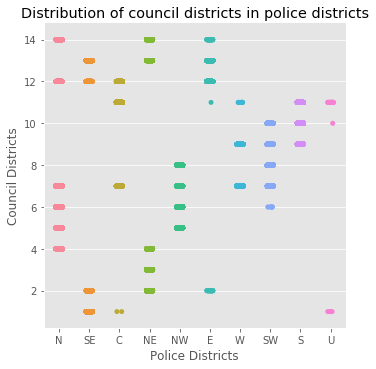

In [32]:
# Lets create a temporary dataframe that holds only police and council districts
temp_df = df.filter(["PoliceDistrict", "CouncilDistrict"], axis=1)

plt.figure( figsize=(10, 8) )

fig = sb.catplot( x = "PoliceDistrict", y = "CouncilDistrict", data = temp_df );
plt.xlabel("Police Districts")
plt.ylabel("Council Districts")
plt.title("Distribution of council districts in police districts")
plt.show(fig)

**This graph shows us that the council districts that belong to the U or Unknown Police District could either be of Police Districts SE, C, S or SW.**

**So we can conclude with resonable certainty that the rows that originally had Nan in the PoliceDistricts column could be marked with either of SE, C, S, or SW.**

**I have not mentioned that the Unknown police districts could be from E because the size of the plot of E for CouncilDistrict 11 is very thin as compared to that of S.**

### 5.2. How many cases were generated from each of the council districts:

**We shall also try to understand the number of cases that were generated per Council District. This could potentially lead to 'CouncilDistrict' becoming an important feature for predicting another variable.**

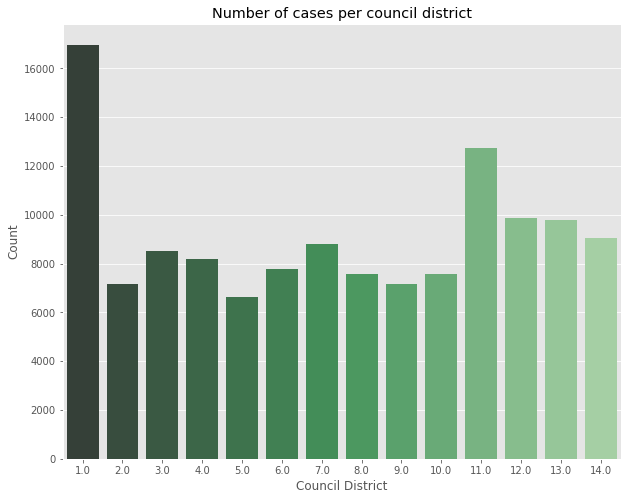

In [33]:
plt.figure( figsize=(10, 8) )
# plot = 
fig = sb.countplot( x = "CouncilDistrict", data = df, palette = "Greens_d" )
plt.xlabel("Council District")
plt.ylabel("Count")
plt.title("Number of cases per council district")
plt.show(fig)

**Inferences from above 2 graphs:**

**Graph 2 clearly shows that the most number of cases were reported from Council District 1 and could thus be from either of S, SW, SE or C Police Districts. The latter has been inferred from the first graph.**

### 5.3. Trend of number of cases generated per year:

**By understanding the trend of the number of cases generated each year, we MAY be able to establish how the housing market may have fared between 2012 and 2019**

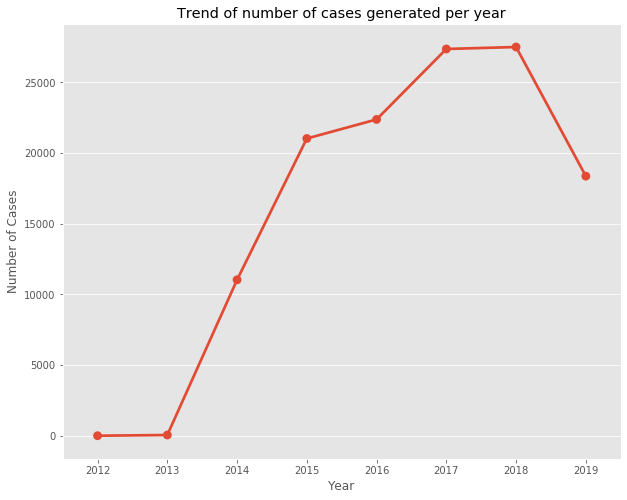

In [34]:
plt.figure( figsize=(10, 8) )

# print( df.CaseYear.value_counts() )

years = sorted(df.CaseYear.unique())
casesPerYear = []
for y in years:
    count = df[df["CaseYear"]==y].CaseYear.count()
    casesPerYear.append(count)

fig = sb.pointplot( x = years, y = casesPerYear, data = df)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Trend of number of cases generated per year")
plt.show(fig)

**This shows us that the general trend has been upwards, except for the last year 2019, meaning that every year the number of cases generated has been more than the previous.**

**The increase in number of cases from 2013 to 2014 is most prominent and suggests that there may have been a big boom in the housing market after 2013 because we can infer that many people must have put in application for permit of occupany of houses.**

### 6. Predicting a dependent variable using 2 other features.

**Let us assume the problem of predicting Police District (PoliceDistrict) given 2 other features**
1. Estimated Cost (Cost_Est)
2. Council District (CouncilDistrict)

In [35]:
# Let us encode the PoliceDistrict column because the plot requires numeric data
PoliceDistrictEncoded = []
PoliceDistrictList = sorted( df.PoliceDistrict.unique() )

df["PoliceDistrictEncoded"] = df.PoliceDistrict.apply(lambda x: PoliceDistrictList.index(x))

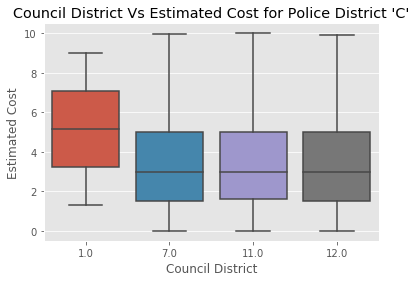

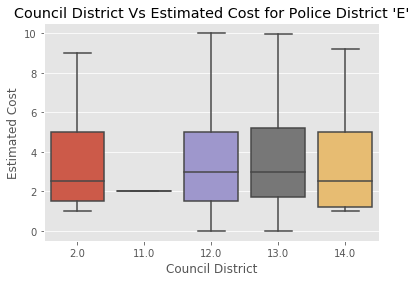

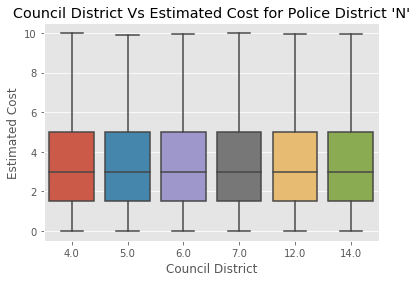

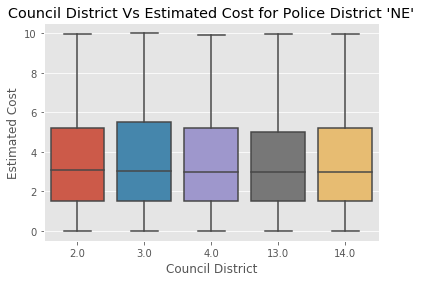

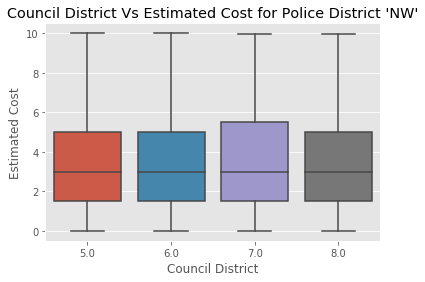

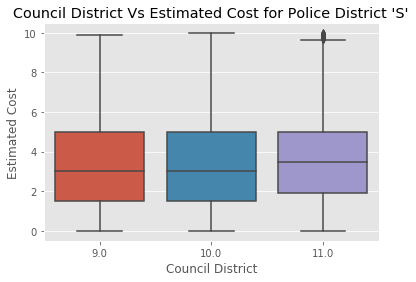

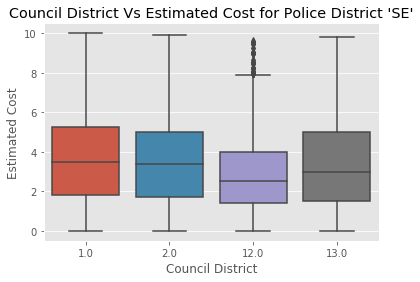

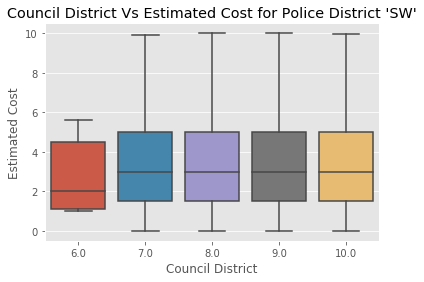

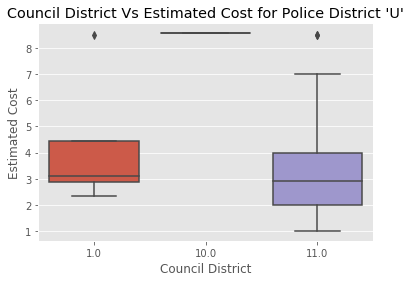

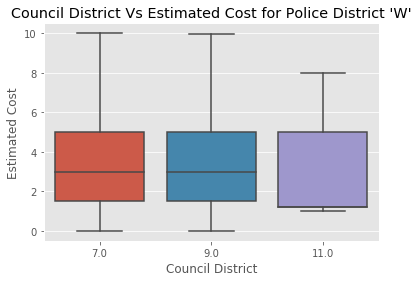

In [36]:
for policedis in PoliceDistrictList:
#     plt.figure( figsize=(8, 8) )
    fig = sb.boxplot( x = "CouncilDistrict", y = "Cost_Est", data = df[df.PoliceDistrict == policedis] )
    plt.xlabel("Council District")
    plt.ylabel("Estimated Cost")
    plt.title("Council District Vs Estimated Cost for Police District '" + policedis + "'")
    plt.show(fig)

As stated earlier, we shall assume the problem of predicting Police district based on given data: Estimated Cost and Council District of a particular case.

As an example we shall assume that Estimated Cost is **0.5** and Council district is **1.0**

With the given data and by correlating the data from the graphs generated above, we can see the following:
1. Council District 1.0 lies in either Police District **C** or **SE**, thus we can narrow down our probable candidates of Police District from 9 to 2.
2. Next, depending on the value of Estimated Cost, we may or may not be able to find the exact Police District:
    * As we can see from the graph above: For the Police District to be SE, the Estimated Cost value has to lie between **0 to 10**.
    * Similarly, for the Police District to be C, the Estimated Cost value has to lie between **1.5 to 9**.
3. Thus we may be able to predict the exact Police District (C or SE) if the value lies between **0 to 1.5** or **9 to 10**. In such a case, we can easily say that the Police District would be SE.
    * If not, then further exploration using other features of the dataset may be required.

*Thus for our example we can say that the Police Distict would be **SE**, since Estimated Cost is **0.5** and Council district is **1.0**.*

**This same approach can be repeated to narrow down the pool of candidates of Police District for any given Estimated Cost and Council District combination.**

**To get the exact Police District, use of other features is also necessary since Estimated Cost and Council District do not seem to show an exact divide.**